In [11]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

fileDir = os.path.dirname(os.path.realpath('__file__'))
print(fileDir)
file = "../../../Received_data_for_tests.csv"
file_avg_power = "../../../avg_power_of_rec_signal_purely_for_check_of_interference.csv"

/Users/mathiasmarkvardsen/bachelor/IOTunderwater/Code/dsp/plotting & data handling


#### Comparison of original and decoded bits if the len of decoded bits is identical to the original bits


Carrier Frequency: 1000 Hz at 500 cm
Test description: Testing: At 5 m now testing for frequency sweep again for power average and BER, keeping stick exactly the same place for next test
Total transmissions: 10
Average signal power: 84.71

Without bandpass:
  Invalid transmissions: 10
  Valid transmissions: 0
  Total errors: 0.0
  BER: N/A

With bandpass:
  Invalid transmissions: 4
  Valid transmissions: 6
  Total errors: 8.0
  BER: 1.39%
--------------------------------------------------

Carrier Frequency: 2000 Hz at 500 cm
Test description: Testing: At 5 m now testing for frequency sweep again for power average and BER, keeping stick exactly the same place for next test
Total transmissions: 10
Average signal power: 9571.43

Without bandpass:
  Invalid transmissions: 3
  Valid transmissions: 7
  Total errors: 261.0
  BER: 38.84%

With bandpass:
  Invalid transmissions: 0
  Valid transmissions: 10
  Total errors: 452.0
  BER: 47.08%
--------------------------------------------------


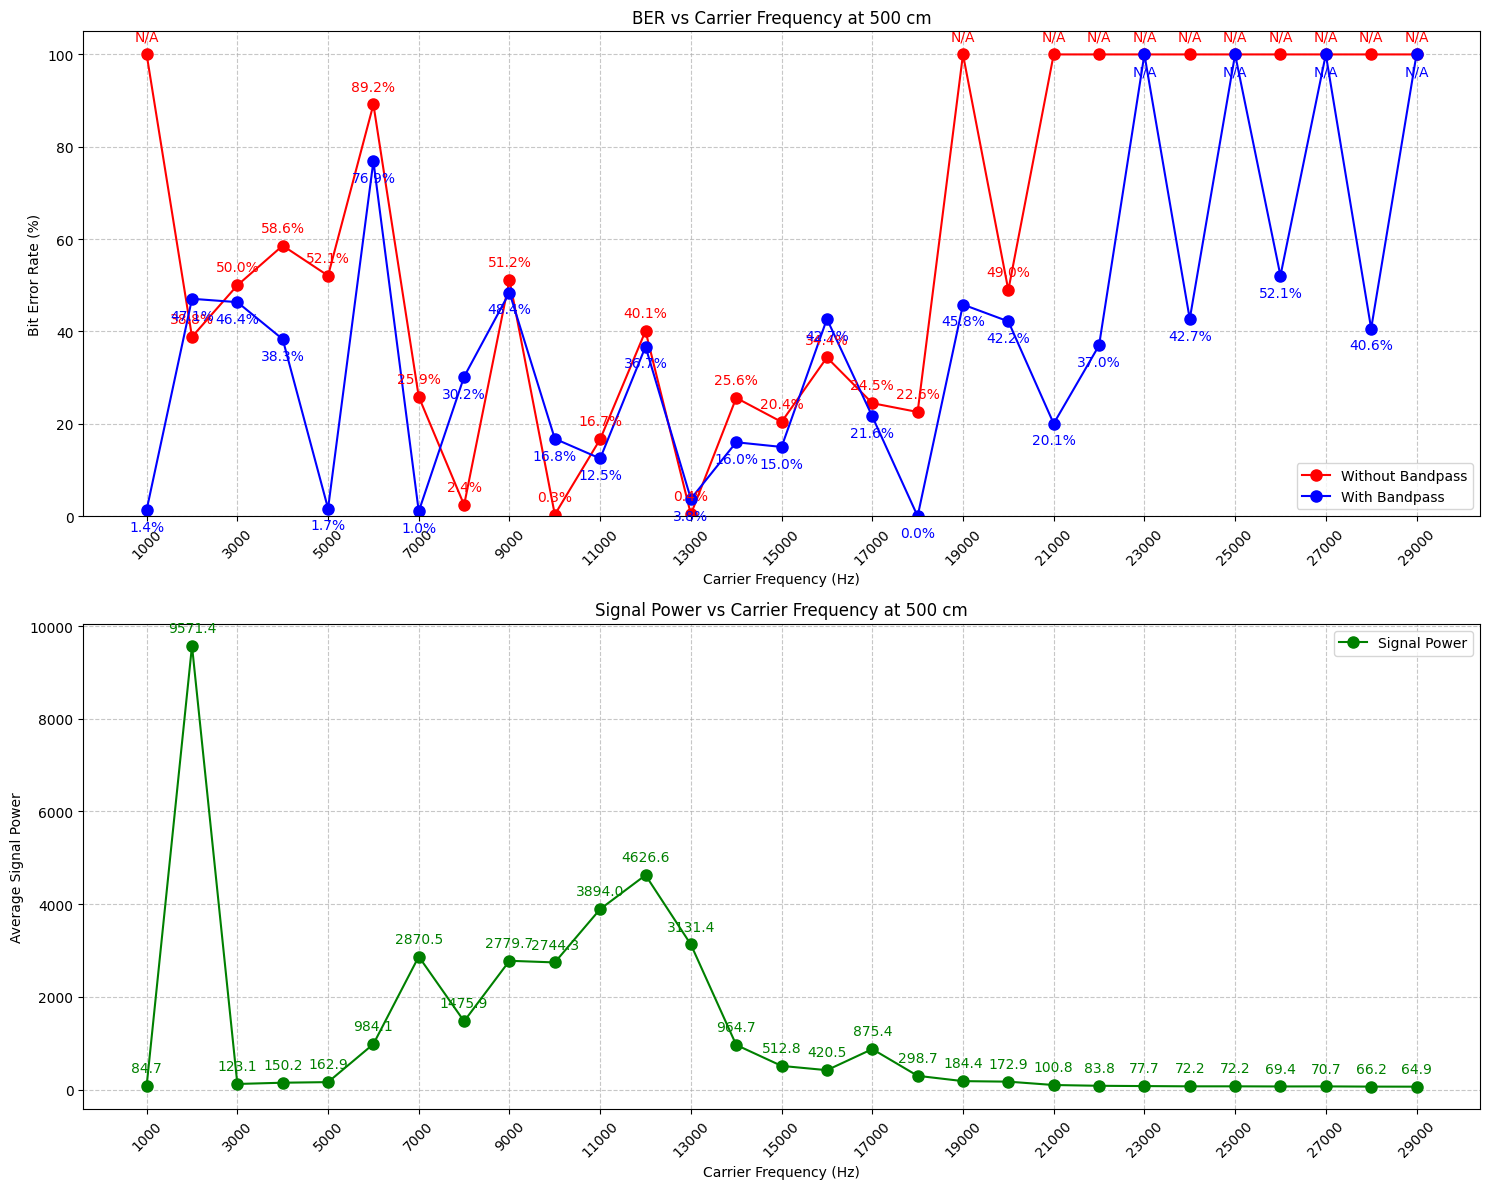

,Carrier_Frequency,Total_Transmissions,Invalid_No_BP,Invalid_BP,Valid_Transmissions_No_BP,Valid_Transmissions_BP,Total_Errors_No_BP,Total_Errors_BP,BER_No_BP,BER_With_BP,Average_Power
0,1000,10,10,4,0,6,0.0,8.0,NaN,1.388889,84.712816
1,2000,10,3,0,7,10,261.0,452.0,38.839286,47.083333,9571.429709
2,3000,10,8,6,2,4,96.0,178.0,50.000000,46.354167,123.124100
3,4000,10,6,5,4,5,225.0,184.0,58.593750,38.333333,150.248858
4,5000,10,7,5,3,5,150.0,8.0,52.083333,1.666667,162.944182
5,6000,10,5,5,5,5,428.0,369.0,89.166667,76.875000,984.134949
6,7000,10,4,6,6,4,149.0,4.0,25.868056,1.041667,2870.489235
7,8000,10,4,0,6,10,14.0,290.0,2.430556,30.208333,1475.901438
8,9000,10,4,4,6,6,295.0,279.0,51.215278,48.437500,2779.744040
9,10000,10,4,0,6,10,2.0,161.0,0.347222,16.770833,2744.328115


In [12]:

def plot_carrier_freq_analysis(results_df, test_description):
    """
    Create plots showing BER and signal power vs carrier frequency at 500 cm
    Including all frequencies from 1000 to 29000 Hz, with N/A values shown at top
    
    Args:
        results_df (pd.DataFrame): DataFrame containing analysis results
    """
    # Create complete range of frequencies
    all_frequencies = range(1000, 30000, 1000)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Ensure all frequencies are in the DataFrame
    complete_df = pd.DataFrame({'Carrier_Frequency': all_frequencies})
    results_df = pd.merge(complete_df, results_df, on='Carrier_Frequency', how='left')
    
    # Replace NaN with 100 for plotting (will appear at top of plot)
    plot_df = results_df.copy()
    plot_df['BER_No_BP'] = plot_df['BER_No_BP'].fillna(100)
    plot_df['BER_With_BP'] = plot_df['BER_With_BP'].fillna(100)
    
    # Plot BER vs Carrier Frequency
    ax1.plot(plot_df['Carrier_Frequency'], plot_df['BER_No_BP'], 
             'ro-', label='Without Bandpass', markersize=8)
    ax1.plot(plot_df['Carrier_Frequency'], plot_df['BER_With_BP'], 
             'bo-', label='With Bandpass', markersize=8)
    
    # Add value labels
    for x, y1, y2 in zip(plot_df['Carrier_Frequency'], 
                        plot_df['BER_No_BP'], 
                        plot_df['BER_With_BP']):
        if y1 == 100:  # N/A value
            ax1.annotate('N/A', (x, y1), textcoords="offset points",
                        xytext=(0, 10), ha='center', color='red')
        elif pd.notna(y1):
            ax1.annotate(f'{y1:.1f}%', (x, y1), textcoords="offset points",
                        xytext=(0, 10), ha='center', color='red')
            
        if y2 == 100:  # N/A value
            ax1.annotate('N/A', (x, y2), textcoords="offset points",
                        xytext=(0, -15), ha='center', color='blue')
        elif pd.notna(y2):
            ax1.annotate(f'{y2:.1f}%', (x, y2), textcoords="offset points",
                        xytext=(0, -15), ha='center', color='blue')
    
    # Configure BER plot
    ax1.set_xlabel('Carrier Frequency (Hz)')
    ax1.set_ylabel('Bit Error Rate (%)')
    ax1.set_title(f'BER vs Carrier Frequency at {dist} cm')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    ax1.set_ylim(0, 105)  # Make room for N/A labels at top
    
    # Set x-axis ticks for every 1000 Hz
    ax1.set_xticks(list(all_frequencies)[::2])  # Show every other frequency to avoid crowding
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot Average Power vs Carrier Frequency
    ax2.plot(results_df['Carrier_Frequency'], results_df['Average_Power'], 
             'go-', label='Signal Power', markersize=8)
    
    # Add value labels for power where data exists
    for x, y in zip(results_df['Carrier_Frequency'], results_df['Average_Power']):
        if pd.notna(y):
            ax2.annotate(f'{y:.1f}', (x, y), textcoords="offset points",
                        xytext=(0, 10), ha='center', color='green')
        else:
            ax2.annotate('N/A', (x, 0), textcoords="offset points",
                        xytext=(0, 10), ha='center', color='green')
    
    # Configure power plot
    ax2.set_xlabel('Carrier Frequency (Hz)')
    ax2.set_ylabel('Average Signal Power')
    ax2.set_title(f'Signal Power vs Carrier Frequency at {dist} cm')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    # Set x-axis ticks for every 1000 Hz
    ax2.set_xticks(list(all_frequencies)[::2])  # Show every other frequency to avoid crowding
    ax2.tick_params(axis='x', rotation=45)
    
    # Adjust layout to prevent label overlap
    plt.tight_layout()
    plt.show()

def analyze_ber_by_carrier_freq(file_path, test_description="Testing: Average power purely for check of interference re-test on 5m"):
    """
    Analyze BER for each carrier frequency at 500 cm distance for a specific test description
    
    Args:
        file_path (str): Path to CSV file containing transmission data
        test_description (str): Description to filter the data by
    
    Returns:
        pd.DataFrame: DataFrame with BER results grouped by carrier frequency
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    global dist
    dist = 500
    if dist == 500:
        test_description = "Testing: At 5 m now testing for frequency sweep again for power average and BER, keeping stick exactly the same place for next test"
    else:
        test_description = "Testing: Average power purely for check of interference"
        
    # Filter by test description and distance
    df = df[df['Test description'] == test_description]
    df = df[df['Distance to speaker'] == dist]
    
    if len(df) == 0:
        print(f"No data found for test description: {test_description}")
        return None
    
    # Convert Hamming distances to integers and handle NaN values
    df['Hamming Dist without bandpass'] = pd.to_numeric(df['Hamming Dist without bandpass'], errors='coerce')
    df['Hamming Dist with bandpass'] = pd.to_numeric(df['Hamming Dist with bandpass'], errors='coerce')
    
    # Group by carrier frequency
    grouped = df.groupby('Carrier Frequency')
    
    results = []
    message_length = 96  # Length of alternating bit sequence (48 '01' pairs)
    
    for carrier_freq, group in grouped:
        # Count total transmissions
        total_entries = len(group)
        
        # Without bandpass
        valid_no_bp = group[group['Decoded without bandpass'] != 'No preamble found']
        total_bits_no_bp = len(valid_no_bp) * message_length
        total_errors_no_bp = valid_no_bp['Hamming Dist without bandpass'].sum()
        invalid_no_bp = total_entries - len(valid_no_bp)
        
        # With bandpass
        valid_bp = group[group['Decoded with bandpass'] != 'No preamble found']
        total_bits_bp = len(valid_bp) * message_length
        total_errors_bp = valid_bp['Hamming Dist with bandpass'].sum()
        invalid_bp = total_entries - len(valid_bp)
        
        # Calculate BER
        ber_no_bp = (total_errors_no_bp / total_bits_no_bp * 100) if total_bits_no_bp > 0 else None
        ber_bp = (total_errors_bp / total_bits_bp * 100) if total_bits_bp > 0 else None
        
        results.append({
            'Carrier_Frequency': carrier_freq,
            'Total_Transmissions': total_entries,
            'Invalid_No_BP': invalid_no_bp,
            'Invalid_BP': invalid_bp,
            'Valid_Transmissions_No_BP': len(valid_no_bp),
            'Valid_Transmissions_BP': len(valid_bp),
            'Total_Errors_No_BP': total_errors_no_bp,
            'Total_Errors_BP': total_errors_bp,
            'BER_No_BP': ber_no_bp,
            'BER_With_BP': ber_bp,
            'Average_Power': group['Average Power of signal'].mean()
        })
        
        # Print results for verification
        print(f"\nCarrier Frequency: {carrier_freq} Hz at 500 cm")
        print(f"Test description: {test_description}")
        print(f"Total transmissions: {total_entries}")
        print(f"Average signal power: {group['Average Power of signal'].mean():.2f}")
        print("\nWithout bandpass:")
        print(f"  Invalid transmissions: {invalid_no_bp}")
        print(f"  Valid transmissions: {len(valid_no_bp)}")
        print(f"  Total errors: {total_errors_no_bp}")
        print(f"  BER: {ber_no_bp:.2f}%" if ber_no_bp is not None else "  BER: N/A")
        print("\nWith bandpass:")
        print(f"  Invalid transmissions: {invalid_bp}")
        print(f"  Valid transmissions: {len(valid_bp)}")
        print(f"  Total errors: {total_errors_bp}")
        print(f"  BER: {ber_bp:.2f}%" if ber_bp is not None else "  BER: N/A")
        print("-" * 50)
    
    # Create DataFrame and sort by frequency
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Carrier_Frequency')
    
    # Plot results
    plot_carrier_freq_analysis(results_df, test_description)
    
    return results_df

file_path = "../../../avg_power_of_rec_signal_purely_for_check_of_interference.csv"



analyze_ber_by_carrier_freq(file_path)